
Undirected Graph



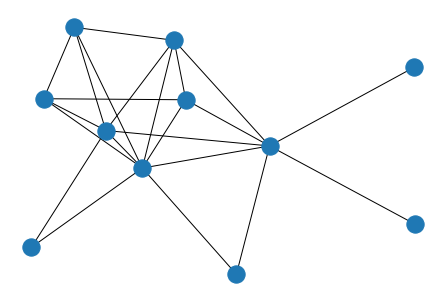


Directed Graph



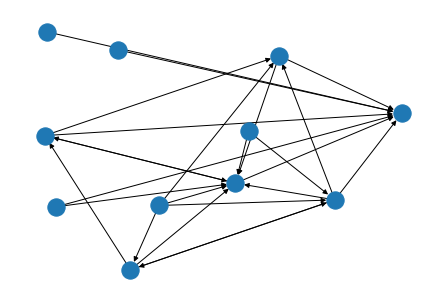


Betweeness Centrality: 

3  :  0.11666666666666665
1  :  0.012962962962962963
10  :  0.005555555555555556
2  :  0.25185185185185194
5  :  0.03518518518518519
6  :  0.02777777777777778
8  :  0.0
9  :  0.0
4  :  0.4166666666666667
7  :  0.0
11  :  0.0

Proximity Prestige :

3  :  0.18181818181818182
1  :  0.15584415584415584
10  :  0.1856060606060606
2  :  0.12121212121212122
5  :  0.12121212121212122
6  :  0.16161616161616163
8  :  0.10822510822510824
9  :  0.1484848484848485
4  :  0
7  :  0.12121212121212122
11  :  0.12121212121212122

*Betweeness Centrality in Descending Order

4  :  0.4166666666666667
2  :  0.25185185185185194
3  :  0.11666666666666665
5  :  0.03518518518518519
6  :  0.02777777777777778
1  :  0.012962962962962963
10  :  0.005555555555555556
8  :  0.0
9  :  0.0
7  :  0.0
11  :  0.0

Proximity Prestige decreasing order:

10  :  0.1856060606060606
3  :  0.18181818181818182
6  :  0.16161616161616163
1  :  0.15584415584415584
9  :  0.1484848484848485
2  :  0.121212121212

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import operator
import numpy as np

G1 = nx.Graph()
G2 = nx.DiGraph()

f = open("network.txt", "r")
f1 =f.read().split()
nodes=int(len(f1)/2)
for i in range(0,nodes-1,2):
    G1.add_edge(f1[i], f1[i+1])
    G2.add_edge(f1[i], f1[i+1])
    
#Undirected Graph
print("\nUndirected Graph\n")
nx.draw(G1)
plt.savefig("simple_path1.png") # save as png
plt.show() # display

#directed Graph
print("\nDirected Graph\n")
nx.draw(G2)
plt.savefig("simple_path2.png") # save as png
plt.show() # display


#betweeness centrality
print("\nBetweeness Centrality: \n")
#functionused from networkx library
bet_centrality = nx.betweenness_centrality(G1, normalized = True, endpoints = False) 
for i in bet_centrality:
    print(i," : ",bet_centrality[i])
node_num=G.number_of_nodes()

#proximity prestige
proximity=[]
for goal in G2.nodes:
    s=0
    dist=0
    I=0
    #finding shortest path between all edges
    dist=nx.single_source_shortest_path_length(G2,goal)
    for i in dist:
        s+=dist[i]
    l=len(dist)
    #storing the distance in proximity array
    if l==0 or s==0:
        proximity.append([goal, 0])
    else:
        proximity.append([goal, (l/(node_num-1))/(s/l)])
print("\nProximity Prestige :\n")
for i in proximity:
    print((i[0]), " : ", (i[1]))
    

#betweeness centrality in descending order
print("\n*Betweeness Centrality in Descending Order\n")
#sorting dictionary based on values in reverse order
sort = dict( sorted(bet_centrality.items(), key=operator.itemgetter(1),reverse=True))
for i in sort:
    print(i," : ",sort[i])

#proximity prestige in descending order 
print("\nProximity Prestige decreasing order:\n")
arr={}
for i in proximity:
    arr[(i[0])]=(i[1])
for w in sorted(arr, key=arr.get, reverse=True):
    print(w," : ", arr[w])
    

#degree for nodes
print("\nDegree of Nodes\n")

G1.degree()
#finding all degree using degree function of networkx library
degree_sequence = list(G1.degree())

nb_nodes = nodes
nb_arr = len(G1.edges())
#using functions to find the degree from numpy library
avg_degree = np.mean(np.array(degree_sequence).astype(np.float)[:,1])
max_degree = max(np.array(degree_sequence).astype(np.float)[:,1])
min_degree = min(np.array(degree_sequence).astype(np.float)[:,1])

print("Maximum : ", int(max_degree))
print("Minimum : ", int(min_degree))
print("Average : ", int(avg_degree))